In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.shape

(299, 13)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### how data is distributed

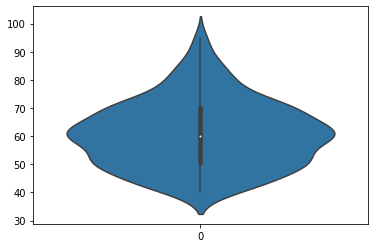

In [7]:
#Age
sn.violinplot(data=df['age'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

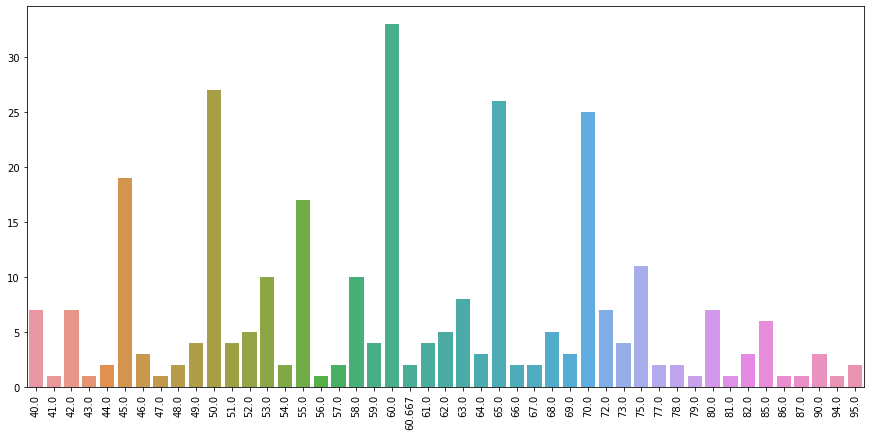

In [8]:
#Age
X=df['age'].value_counts().index
Y=df['age'].value_counts().values
plt.figure(figsize=(15,7))
sn.barplot(x=X,y=Y)
plt.xticks(rotation=90)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


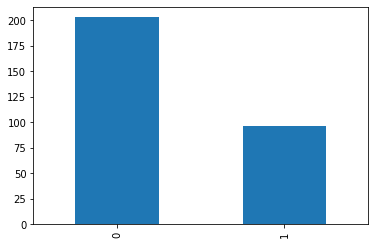

In [9]:
#Death Event
df['DEATH_EVENT'].value_counts().plot(kind='bar')
print(df['DEATH_EVENT'].value_counts())

Percentage of male that died due to heart failure 64.58333333333333


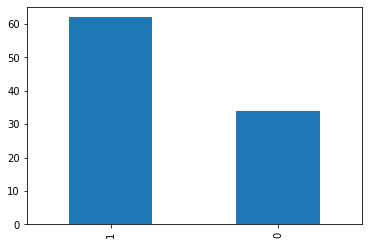

In [10]:
# Number of males and females that dies due to heart filure
data=df[df['DEATH_EVENT']==1]['sex'].value_counts()
data.plot(kind='bar')
print(f'Percentage of male that died due to heart failure {data[1]*100/(data[1]+data[0])}')

In [11]:
# We need to see various features with respect to the Death Event feature so instead of repeating the same thing again
# and again we rather make a function
def death_plot(fname,label):
    data=df[df['DEATH_EVENT']==1][fname].value_counts()
    X=data.index
    Y=data.values
    sn.barplot(x=X,y=Y,hue=X,palette="Blues_d",dodge=False)
    plt.xticks(rotation=90)
    print(data)
    print(f'Percentage of {label}{ data[1]*100/(data[0]+data[1])}')


0    66
1    30
Name: smoking, dtype: int64
Percentage of smokers that suffered heart failure 31.25


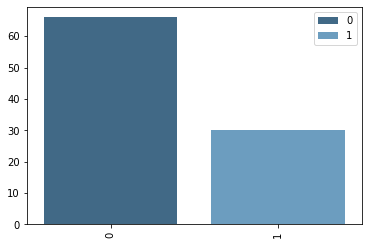

In [12]:
death_plot('smoking','smokers that suffered heart failure ')

0    56
1    40
Name: diabetes, dtype: int64
Percentage of Person suffering from diabetes that suffered heart failure41.666666666666664


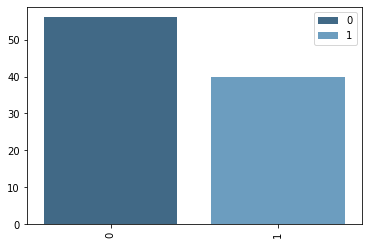

In [13]:
death_plot('diabetes','Person suffering from diabetes that suffered heart failure')

0    57
1    39
Name: high_blood_pressure, dtype: int64
Percentage of Person suffering from high BP that suffered heart failure 40.625


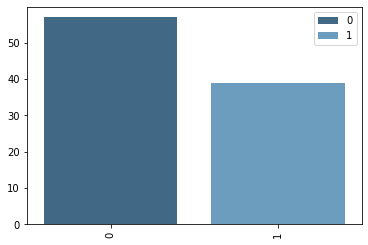

In [14]:
death_plot('high_blood_pressure','Person suffering from high BP that suffered heart failure ')

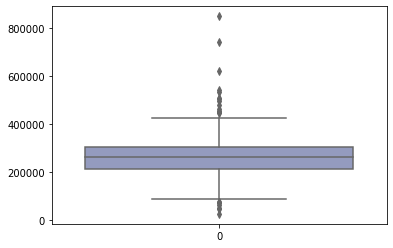

In [15]:
sn.boxplot(data=df['platelets'],palette='BuPu_r')

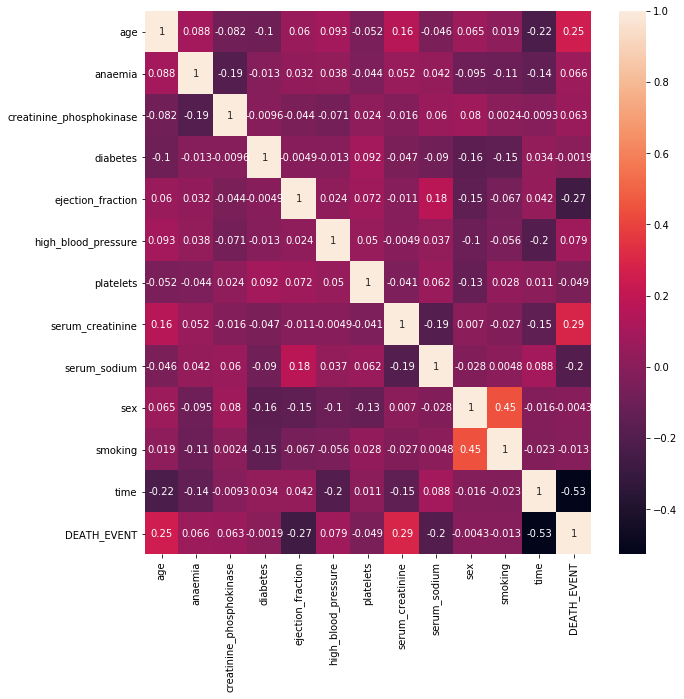

In [16]:
#Correlations between different features
corr=df.corr()
plt.figure(figsize=(10,10))
sn.heatmap(data=corr,annot=True)

####  feature selection

In [17]:
X=df.drop(columns='DEATH_EVENT')
Y=df['DEATH_EVENT']

In [18]:
ft_clf=ExtraTreesClassifier()
ft_clf.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

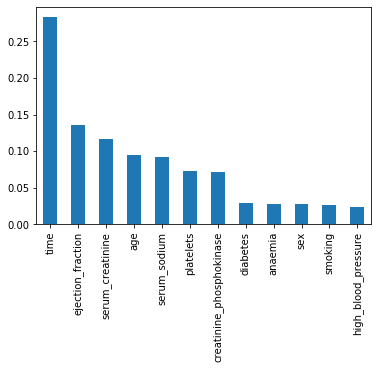

In [19]:
feature_importance = ft_clf.feature_importances_ 
pd.Series(feature_importance,index=X.columns).sort_values(ascending=False).plot(kind='bar')

### Scaling the values

In [20]:
scaling=StandardScaler()
scaled_X=scaling.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y)

### Model training

In [22]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
x_train_predict=model.predict(X_train)
score_training=accuracy_score(x_train_predict,Y_train)

In [24]:
score_training

0.8660714285714286

In [25]:
predictions=model.predict(X_test)

In [26]:
accuracy_score(Y_test,predictions)

0.76

### hyperparameter tuning

In [27]:
parameters={
    'C':np.arange(1,100,1),
    'penalty':['l2','l1']
}
hyp_tuning=RandomizedSearchCV(model,param_distributions=parameters,scoring='accuracy',cv=3)

In [28]:
start=time.clock()
hyp_tuning.fit(X_train,Y_train)
print(f'{time.clock()-start} seconds')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


0.25137209999999754 seconds


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
hyp_tuning.best_params_

{'penalty': 'l2', 'C': 53}

In [30]:
hyp_tuning.best_estimator_

LogisticRegression(C=53, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
hyp_tuning.best_score_

0.8527927927927929

### Hypertuned model

In [32]:
model=LogisticRegression(C=31, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train,Y_train)

LogisticRegression(C=31, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions=model.predict(X_test)

In [34]:
score_training=accuracy_score(Y_test,predictions)
score_training

0.76

### Random Forest

In [112]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
#training accuracy
training_predictions=model_rf.predict(X_train)
accuracy_score(Y_train,training_predictions)

1.0

In [114]:
# The model is overfittting we can see that
testing_predictions=model_rf.predict(X_test)
accuracy_score(Y_test,testing_predictions)

0.8266666666666667

###### Its overfitting so we should do hyper parameter tuning
### Hyperparameter tuning

In [197]:
# parameters={
#     'n_estimators':[100,200,300,500,700],
#     'criterion':['gini', 'entropy'],
#     'min_samples_split':[2,3,4,5,7,10],
#     'max_leaf_nodes':[2,5,7,9,11,13],
#     'class_weight':[{1:0.7,0:0.3},{1:0.6,0:0.4},{1:0.8,0:0.2}]
# }
parameters={
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
hyp_tuning=RandomizedSearchCV(model_rf,param_distributions=parameters,scoring='accuracy',cv=5)

In [198]:
start=time.clock()
hyp_tuning.fit(X_train,Y_train)
print(f'{time.clock()-start} seconds')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


150.9475324999985 seconds


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
hyp_tuning.best_score_

0.8570707070707071

In [200]:
hyp_tuning.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Model using the hyper tuned parameters

In [209]:
model_tuned=hyp_tuning.best_estimator_

In [210]:
model_tuned.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
predictions=model_tuned.predict(X_test)
accuracy_score(Y_test,predictions)

0.8533333333333334

In [212]:
confusion_matrix(Y_test,predictions)

array([[48,  5],
       [ 6, 16]], dtype=int64)